In [2]:
%pylab inline
import matplotlib.pyplot as plt
import PIL
import numpy as np
from glob import glob
from scipy.cluster.vq import kmeans
import networkx as nx
from skimage.io import imread

Populating the interactive namespace from numpy and matplotlib


In [3]:
def dist(c1, c2):
    return ((c1 - c2)**2).sum()

In [4]:
def apply_cut(img, classes, centers):
    assert len(centers) == 2
    result = img // 4
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            result[x][y] += centers[classes[x][y]]
    result = np.clip(result, 0, 255)
    return result

In [5]:
def process_img(img_file, cut_func, centers, show=False):
    img = np.array(PIL.Image.open(img_file))[:, :, :3].astype('int64')

    centers = np.array(centers)
    #print("Cenrters:", centers, "\n")
    classes = cut_func(img, centers)
    #print("Classes:", classes, "\n")
    penalty = get_penalty(img, classes, centers)
    #print("Penalty:", penalty, "\n")
    clustered = apply_cut(img, classes, centers)
    #print("Clustered:", clustered, "\n")
    
    if show:
        fig = plt.figure(figsize=(16, 8))
        fig.add_subplot(1, 2, 1)
        plt.imshow(img)

        fig.add_subplot(1, 2, 2)
        plt.imshow(clustered)
        plt.show()

    return penalty

In [6]:
def simple_get_centers(img_file):
    img = np.array(PIL.Image.open(img_file))[:, :, :3].astype('float').reshape((-1, 3))
    return kmeans(img.astype('float'), 2)[0].astype('int64')

In [7]:
def get_penalty(img, classes, centers):
    assert len(centers) == 2
    result = 0
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            result += dist(img[x][y], centers[classes[x][y]])
    return result

In [8]:
def simple_cut(img, centers):
    assert len(centers) == 2
    classes = np.zeros_like(img[:, :, 0])
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            if dist(img[x][y], centers[0]) < dist(img[x][y], centers[1]):
                classes[x][y] = 0
            else:
                classes[x][y] = 1
    return classes

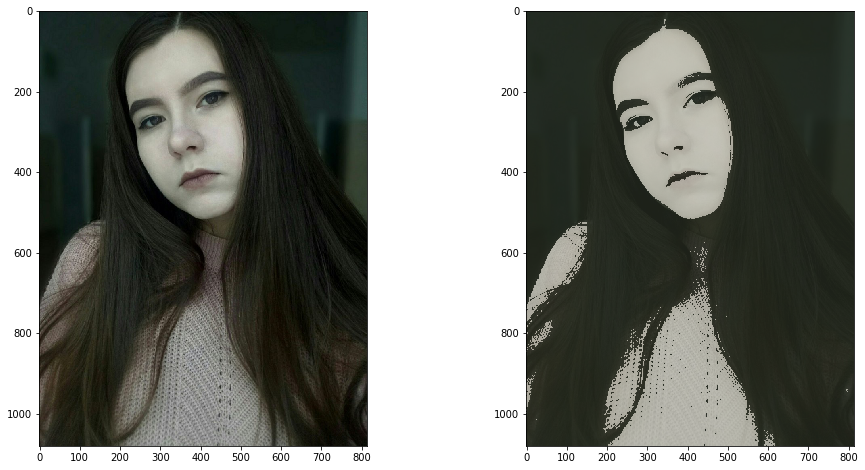

1084167317

In [10]:
img = (r'C:\Users\dmsus\Desktop\me.jpg')
c = simple_get_centers(img)
process_img(img, simple_cut, c, True)



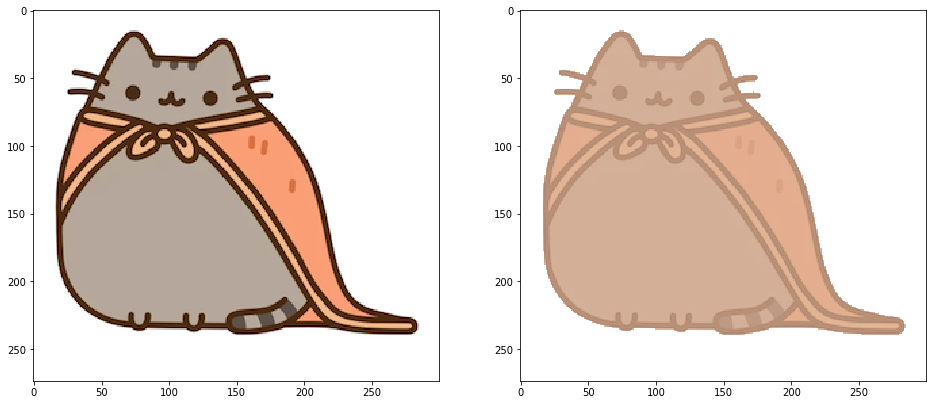

356575947

In [48]:
img = (r'C:\Users\dmsus\Desktop\cat.png')
c = simple_get_centers(img)
process_img(img, simple_cut, c, True)



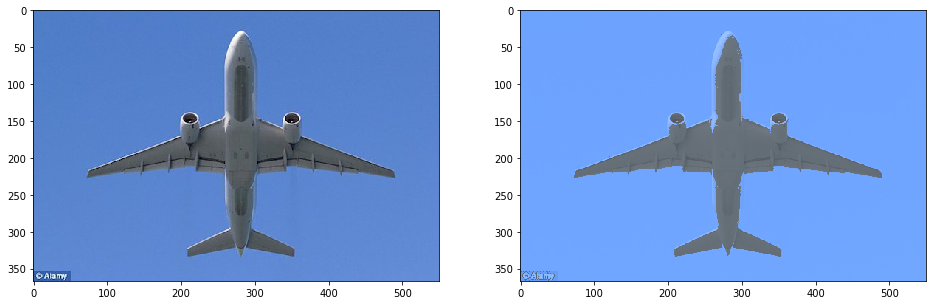

71569516

In [49]:
img = (r'C:\Users\dmsus\Desktop\plane.jpg')
c = simple_get_centers(img)
process_img(img, simple_cut, c, True)

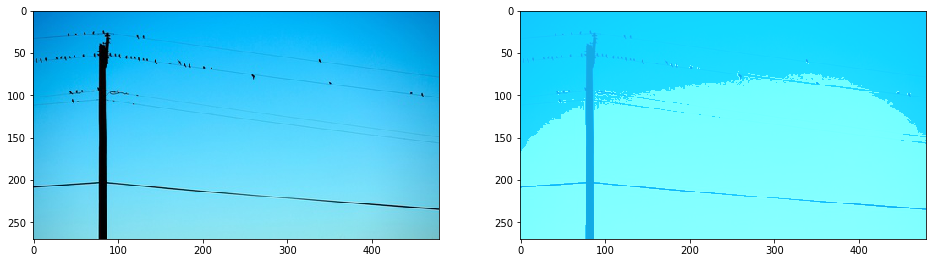

301193455

In [50]:
img = (r'C:\Users\dmsus\Desktop\sky.jpg')
c = simple_get_centers(img)
process_img(img, simple_cut, c, True)


C:\Users\dmsus\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: numpy.hypot
  


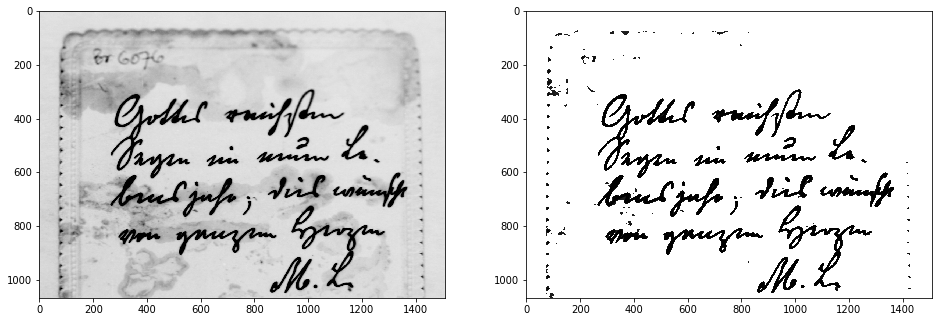

126104820.3931257

In [27]:
img = (r'C:\Users\dmsus\Desktop\1.bmp')
process_img(img, simple_cut, [[0, 0, 0], [255, 255, 255]], True)

C:\Users\dmsus\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: numpy.hypot
  


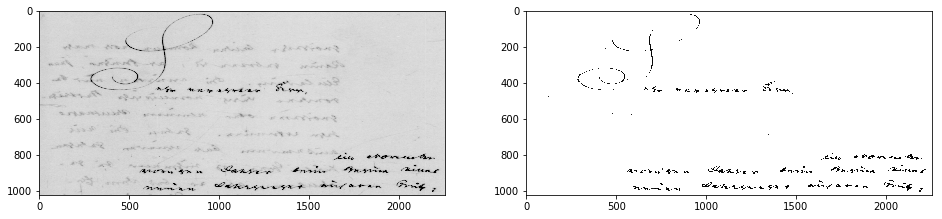

172406894.5888021

In [28]:
img = (r'C:\Users\dmsus\Desktop\2.bmp')
process_img(img, simple_cut, [[0, 0, 0], [255, 255, 255]], True)

C:\Users\dmsus\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: numpy.hypot
  


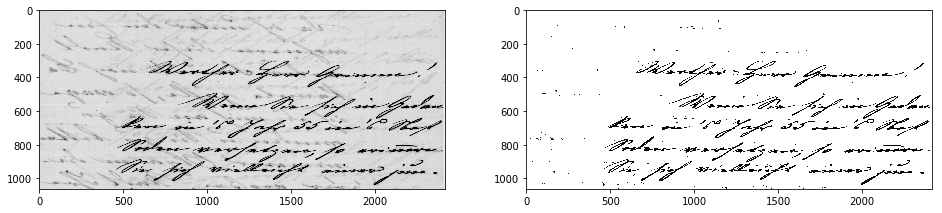

187399159.1845148

In [29]:
img = (r'C:\Users\dmsus\Desktop\3.bmp')
process_img(img, simple_cut, [[0, 0, 0], [255, 255, 255]], True)

C:\Users\dmsus\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: numpy.hypot
  


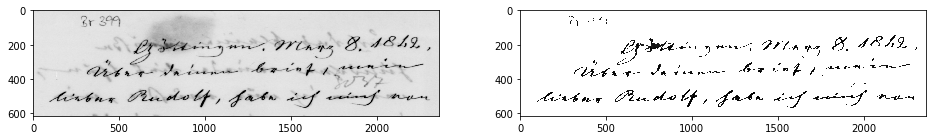

97701738.46088867

In [30]:
img = (r'C:\Users\dmsus\Desktop\4.bmp')
process_img(img, simple_cut, [[0, 0, 0], [255, 255, 255]], True)

C:\Users\dmsus\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: numpy.hypot
  


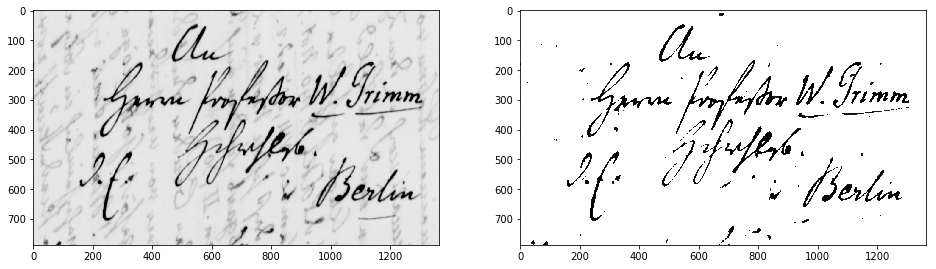

66293326.67253031

In [32]:
img = (r'C:\Users\dmsus\Desktop\6.bmp')
process_img(img, simple_cut, [[0, 0, 0], [255, 255, 255]], True)

C:\Users\dmsus\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: numpy.hypot
  


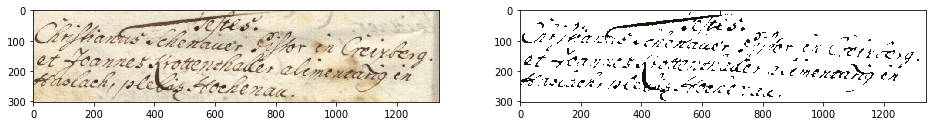

34328806.78431746

In [34]:
img = (r'C:\Users\dmsus\Desktop\9.bmp')
process_img(img, simple_cut, [[0, 0, 0], [255, 255, 255]], True)

C:\Users\dmsus\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: numpy.hypot
  


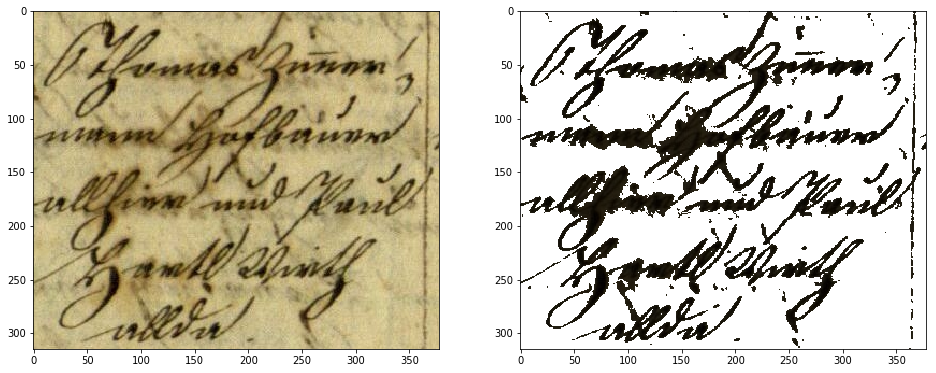

19235071.89945001

In [35]:
img = (r'C:\Users\dmsus\Desktop\10.bmp')
process_img(img, simple_cut, [[0, 0, 0], [255, 255, 255]], True)

C:\Users\dmsus\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: numpy.hypot
  


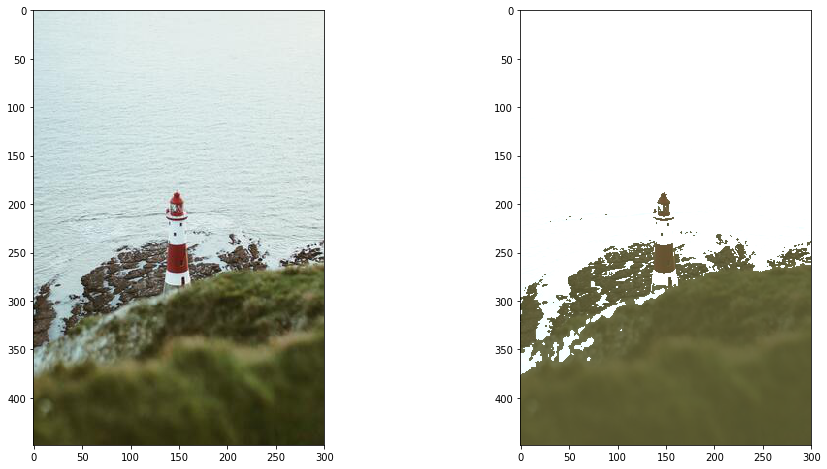

3711210.7867422258

In [40]:
img  = (r'C:\Users\dmsus\Desktop\beacon.jpg')
c = simple_get_centers(img)
process_img(img, simple_cut, c, True)

C:\Users\dmsus\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: numpy.hypot
  


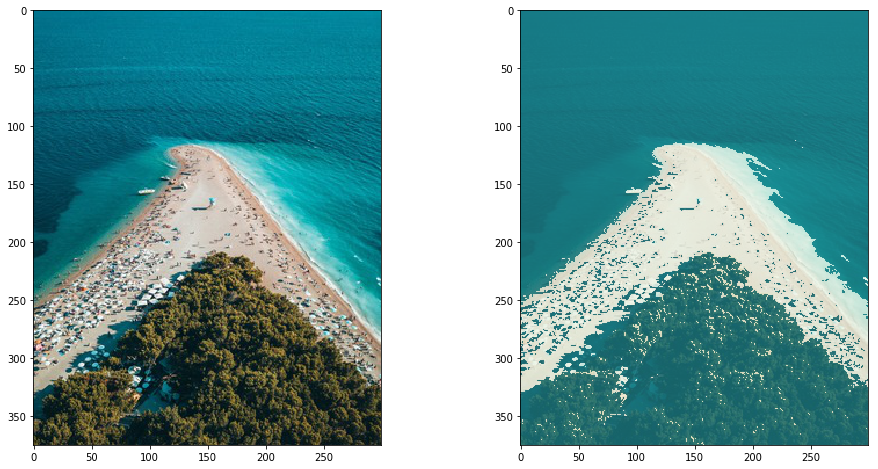

7097110.726666917

In [37]:
img = (r'C:\Users\dmsus\Desktop\coast.jpg')
c = simple_get_centers(img)
process_img(img, simple_cut, c, True)

C:\Users\dmsus\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: numpy.hypot
  


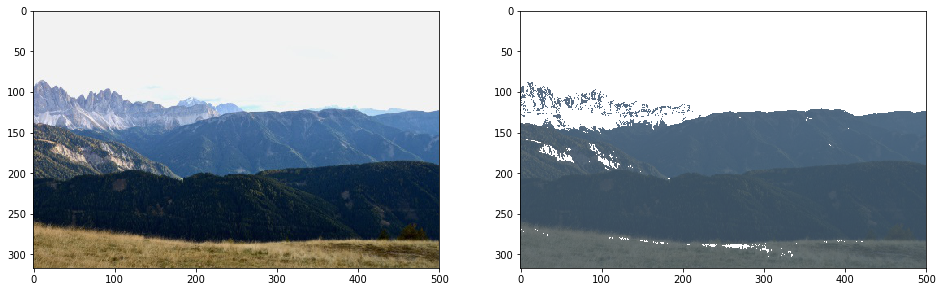

8868187.111830765

In [38]:
img = (r'C:\Users\dmsus\Desktop\landscape.jpg')
c = simple_get_centers(img)
process_img(img, simple_cut, c, True)

C:\Users\dmsus\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: numpy.hypot
  


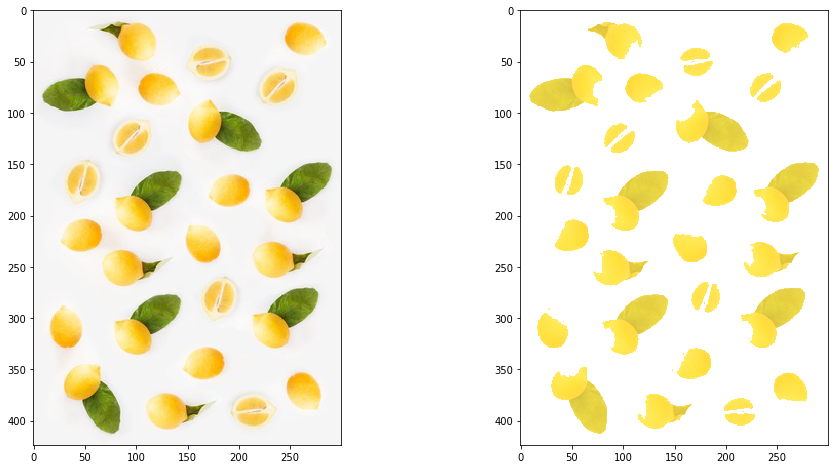

3551201.5377658475

In [39]:
img = (r'C:\Users\dmsus\Desktop\lemons.jpg')
c = simple_get_centers(img)
process_img(img, simple_cut, c, True)

In [11]:
from collections import defaultdict 

#реализовано полностью по псевдокоду, это единственный комент, который я могу тут оставить 😅
def BFS(s, t, parent, graph):
    visited = [False] * len(graph)
    queue = []
    queue.append(s)
    visited[s] = True
    while queue:
        u = queue.pop(0)
        for i, j in enumerate(graph[u]):
            if visited[i] == False and j > 0:
                queue.append(i)
                visited[i] = True
                parent[i] = u
    if visited[t]:
        return True
    else:
        return False


In [12]:
def find_tr(s, t, parent, graph):
    visited = [False] * len(graph)
    queue = []
    queue.append(s)
    visited[s] = True
    while queue:
        u = queue.pop(0)
        for i, j in enumerate(graph[u]):
            if visited[i] == False and j > 0:
                queue.append(i)
                visited[i] = True
                parent[i] = u
    nodes = [set(), set()]
    #храню минимальный разрез так - в nodes[0] - вершины принадлеэащие одной доле, в nodes[1] - второй
    for i in range(len(visited)):
        if (visited[i]):
            nodes[0].add(i)
        else:
            nodes[1].add(i)
    return nodes

In [14]:
def min_cut(source, sink, graph):
    parent = [-1] * len(graph)
    max_flow = 0
    while BFS(source, sink, parent, graph):
        cur_flow = float("Inf")
        s = sink
        while (s != source):
            if (graph[parent[s]][s] < cur_flow):
                path_flow = graph[parent[s]][s]
            s = parent[s]
        max_flow += cur_flow
        v = sink
        while (v != source):
            u = parent[v]
            graph[u][v] -= cur_flow
            graph[v][u] += cur_flow
            v = parent[v]
    return find_tr(source, sink, parent, graph)

In [15]:
#просто проверяю, работает ли эта хрень на маленьком графе

graph = [[0, 20, 30, 10, 0], 
        [0, 0, 40, 0, 30], 
        [0, 0, 0, 10, 20], 
        [0, 0, 5, 0, 20], 
        [0, 0, 0, 0, 0]] 

source = 0; sink = 4
   
print (min_cut(source, sink, graph)) 

[{0}, {1, 2, 3, 4}]


In [ ]:
#работает

In [ ]:
#пробовала тестить все на маленьких (совсем) картинках, вроде, тоже работает

In [16]:
%pylab inline
import matplotlib.pyplot as plt
import PIL
import numpy as np
from glob import glob
from scipy.cluster.vq import kmeans
import networkx as nx
from skimage.io import imread

Populating the interactive namespace from numpy and matplotlib


C:\Users\dmsus\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['source', 'dist', 'imread']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [17]:
def my_cut(img, classes, centers):
    partition = classes
    n = 50
    #print('Штраф = ', summ)
    assert len(centers) == 2
    result = img // 4
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            if (x*n+y in partition[0]): #не спрашивай, почему именно так
                result[x][y] += centers[0] #так картинка выглядит покрасивее)))
            elif (x*n+y in partition[1]):
                result[x][y] += centers[1]
         
    result = np.clip(result, 0, 255)
    return result

In [18]:
def my_cut_D(img, classes, centers):
    partition = classes
    print('Штраф = ', summ)
    assert len(centers) == 2
    result = img // 4
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            if ((x, y) in partition[0]): 
                result[x][y] += centers[0]
            elif ((x, y) in partition[1]):
                result[x][y] += centers[1]
                
    result = np.clip(result, 0, 255)
    return result

In [19]:
def graphing(graph, s, t): #для DiGraph и встроенной функции nx.minimum_cut
    m = len(graph)
    n = len(graph[0])
    matrix = nx.DiGraph()
    for i in range(m):
        for j in range(n):
          #нижний сосед
            if (i != (m - 1)):
                matrix.add_edge((i+1, j),(i,j), capacity = 1 / (1+np.sqrt(dist(graph[i][j], graph[i+1][j]))/ 255))
          #верхний сосед
            if (i != 0):
                matrix.add_edge((i-1, j),(i,j), capacity = 1 / (1+np.sqrt(dist(graph[i][j], graph[i-1][j]))/ 255))
          #правый сосед
            if (j != (n - 1)):
                matrix.add_edge((i, j+1),(i,j), capacity = 1 / (1+np.sqrt(dist(graph[i][j], graph[i][j+1]))/ 255))
            if (j != 0):
                matrix.add_edge((i, j-1),(i,j), capacity = 1 / (1+np.sqrt(dist(graph[i][j], graph[i][j-1]))/ 255))
    
    for i in range(m):
        for j in range(n):
            matrix.add_edge(('s'),(i,j), capacity = (np.sqrt(dist(graph[i][j], s))))
            matrix.add_edge((i,j),('t'), capacity = (np.sqrt(dist(graph[i][j], t))))
    return matrix


In [20]:
def my_gr (graph, s, t): #для матрицы смежности и моей функции min_cut
    m = len(graph)
    n = len(graph[0])
    matrix = [[0 for j in range(m*n+2)] for i in range(m*n+2)]
    for i in range(m):
        for j in range(n):
          #нижний сосед
            if (i != (m - 1)):
                matrix[i*n+j][i*n+j+n] = 1 / (1+np.sqrt(dist(graph[i][j], graph[i+1][j]))/ 255)
          #верхний сосед
            if (i != 0):
                matrix[i*n+j][i*n+j-n] = 1 / (1+np.sqrt(dist(graph[i][j], graph[i-1][j]))/ 255)
          #правый сосед
            if (j != (n - 1)):
                matrix[i*n+j][i*n+j+1] = 1 / (1+np.sqrt(dist(graph[i][j], graph[i][j+1]))/ 255)
            if (j != 0):
                matrix[i*n+j][i*n+j-1] = 1 / (1+np.sqrt(dist(graph[i][j], graph[i][j-1]))/ 255)
    
    for i in range(m):
        for j in range(n):
            matrix[i*n+j][-2] = (np.sqrt(dist(graph[i][j], s)))
            matrix[-1][i*n+j] = (np.sqrt(dist(graph[i][j], t)))
    return matrix

Размер изображения равен:  10 x 15


C:\Users\dmsus\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: numpy.hypot
  if __name__ == '__main__':
C:\Users\dmsus\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: numpy.hypot
  from ipykernel import kernelapp as app
C:\Users\dmsus\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: numpy.hypot
C:\Users\dmsus\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: numpy.hypot
  if sys.path[0] == '':
C:\Users\dmsus\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: MatplotlibDeprecationWarning: numpy.hypot
C:\Users\dmsus\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: numpy.hypot


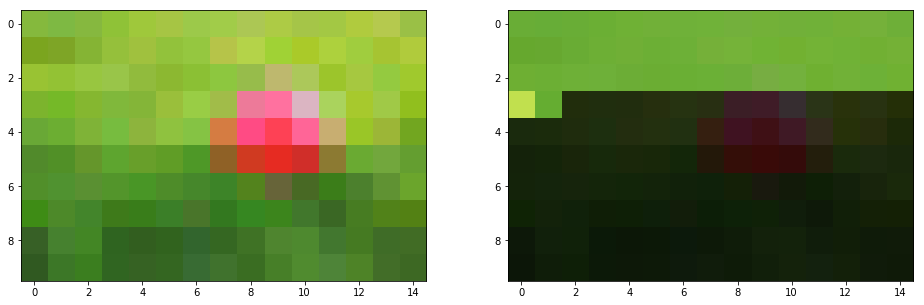

In [21]:
img = np.array(PIL.Image.open(r'C:\Users\dmsus\Desktop\ball.jpg'))[:, :, :3].astype('float').reshape((-1, 3))
colors = kmeans(img.astype('float'), 2)[0].astype('int64')
s = colors[0]
t = colors[1]

file = (r'C:\Users\dmsus\Desktop\ball.jpg')
img = PIL.Image.open(file)
graph = np.array(img, dtype='uint8')[:, :, :3]
print('Размер изображения равен: ', len(graph), 'x', len(graph[0]))

g = my_gr(graph, s, t)
img = np.array(PIL.Image.open(r'C:\Users\dmsus\Desktop\ball.jpg'))[:, :, :3].astype('int64')
clustered = my_cut(img, min_cut(150, 151, g), colors)
fig = plt.figure(figsize=(16, 8))
fig.add_subplot(1, 2, 1)
plt.imshow(img)
fig.add_subplot(1, 2, 2)
plt.imshow(clustered)
plt.show()

In [14]:
img = np.array(PIL.Image.open(r'C:\Users\dmsus\Desktop\cat.png'))[:, :, :3].astype('float').reshape((-1, 3))
colors = kmeans(img.astype('float'), 2)[0].astype('int64')
s = colors[0]
t = colors[1]

file = (r'C:\Users\dmsus\Desktop\cat.png')
img = PIL.Image.open(file)
graph = np.array(img, dtype='uint8')[:, :, :3]
print('Размер изображения равен: ', len(graph), 'x', len(graph[0]))

g = graphing(graph, s, t)
img = np.array(PIL.Image.open(r'C:\Users\dmsus\Desktop\cat.png'))[:, :, :3].astype('int64')
clustered = my_cut(img, nx.minimum_cut(g, 's', 't'), colors)
fig = plt.figure(figsize=(16, 8))
fig.add_subplot(1, 2, 1)
plt.imshow(img)
fig.add_subplot(1, 2, 2)
plt.imshow(clustered)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\dmsus\\Desktop\\cat.png'

Размер изображения равен:  270 x 480
Штраф =  4208124.159231521


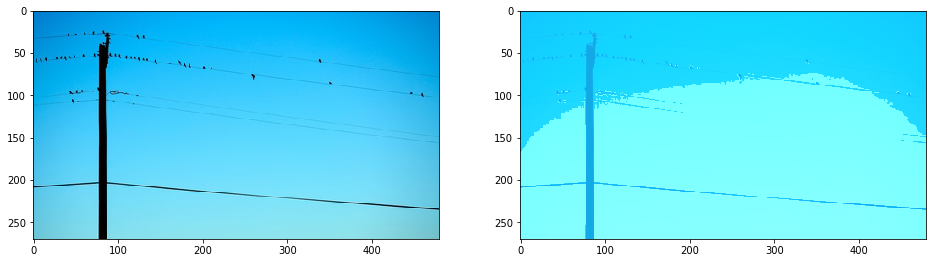

In [45]:
img = np.array(PIL.Image.open(r'C:\Users\dmsus\Desktop\sky.jpg'))[:, :, :3].astype('float').reshape((-1, 3))
colors = kmeans(img.astype('float'), 2)[0].astype('int64')
s = colors[0]
t = colors[1]

file = (r'C:\Users\dmsus\Desktop\sky.jpg')
img = PIL.Image.open(file)
graph = np.array(img, dtype='uint8')[:, :, :3]
print('Размер изображения равен: ', len(graph), 'x', len(graph[0]))

g = graphing(graph, s, t)
img = np.array(PIL.Image.open(r'C:\Users\dmsus\Desktop\sky.jpg'))[:, :, :3].astype('int64')
clustered = my_cut(img, nx.minimum_cut(g, 's', 't'), colors)
fig = plt.figure(figsize=(16, 8))
fig.add_subplot(1, 2, 1)
plt.imshow(img)
fig.add_subplot(1, 2, 2)
plt.imshow(clustered)
plt.show()

Размер изображения равен:  367 x 550
Штраф =  2194416.728197239


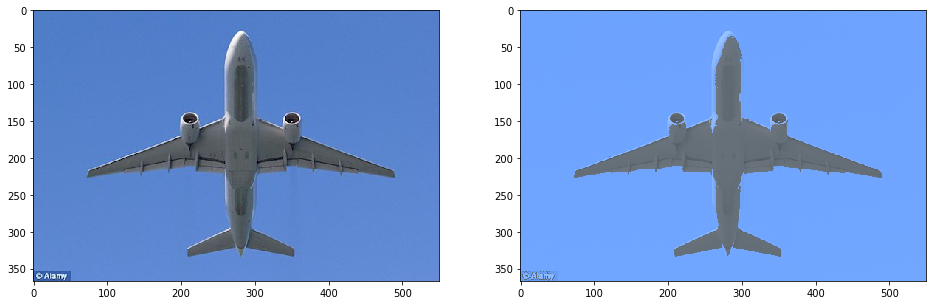

In [46]:
img = np.array(PIL.Image.open(r'C:\Users\dmsus\Desktop\plane.jpg'))[:, :, :3].astype('float').reshape((-1, 3))
colors = kmeans(img.astype('float'), 2)[0].astype('int64')
s = colors[0]
t = colors[1]

file = (r'C:\Users\dmsus\Desktop\plane.jpg')
img = PIL.Image.open(file)
graph = np.array(img, dtype='uint8')[:, :, :3]
print('Размер изображения равен: ', len(graph), 'x', len(graph[0]))

g = graphing(graph, s, t)
img = np.array(PIL.Image.open(r'C:\Users\dmsus\Desktop\plane.jpg'))[:, :, :3].astype('int64')
clustered = my_cut(img, nx.minimum_cut(g, 's', 't'), colors)
fig = plt.figure(figsize=(16, 8))
fig.add_subplot(1, 2, 1)
plt.imshow(img)
fig.add_subplot(1, 2, 2)
plt.imshow(clustered)
plt.show()

In [52]:
print('Сравним полученные штрафы')
print('Cat:')
print('Исходный алгоримтм: 356575947   Мой алгоритм: 3276317')
print('Ball:')
print('Исходный алгоритм: 110120052    Мой алгоритм: 1620184')
print('Sky:')
print('Исходный алгоритм: 301193455    Мой алгоритм: 4208124')
print('Plane')
print('Исходный алгоритм: 71569516     Мой алгоритм: 2194417')
print('На остальных изображениях мой алгоритм будет работать вечность, так что выводить их не стала, но уверена, что штраф он выдаст меньший :)')

Сравним полученные штрафы
Cat:
Исходный алгоримтм: 356575947   Мой алгоритм: 3276317
Ball:
Исходный алгоритм: 110120052    Мой алгоритм: 1620184
Sky:
Исходный алгоритм: 301193455    Мой алгоритм: 4208124
Plane
Исходный алгоритм: 71569516     Мой алгоритм: 2194417
На остальных изображениях мой алгоритм будет работать вечность, так что выводить их не стала, но уверена, что штраф он выдаст меньший :)


Как можно заметить, моя кластеризация дает штрафы в несколько раз, а то и десятков раз меньшие, чем простое отнесение к ближашим классам. Это победа.
Различия на изображениях, если честно, совсем минмальные.
А на интуитивно наилучшую кластеризацию то тоже не очень похоже. Думаю, штраф бы был еще поменьше, если б мы смотрели не 4 соседей для каждого пикселя, а 8.


Размер изображения равен:  160 x 240
Штраф = 3279.013963956911 *alpha +  1615980.2265333785 *beta
Штраф =  1619256.0172593682


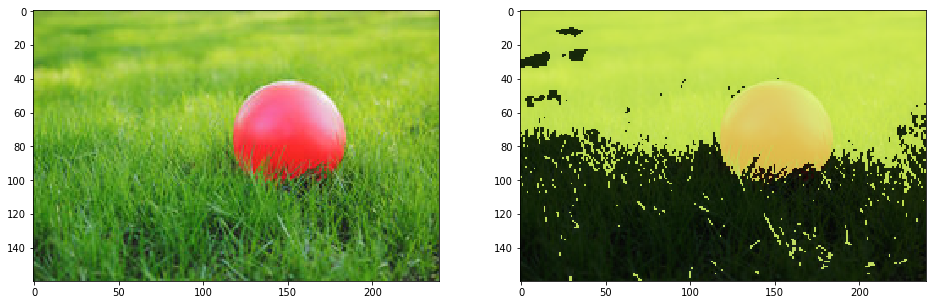

In [14]:
img = np.array(PIL.Image.open(r'C:\Users\dmsus\Desktop\ball.jpg'))[:, :, :3].astype('float').reshape((-1, 3))
colors = kmeans(img.astype('float'), 2)[0].astype('int64')
s = colors[0]
t = colors[1]

file = (r'C:\Users\dmsus\Desktop\ball.jpg')
img = PIL.Image.open(file)
graph = np.array(img, dtype='uint8')[:, :, :3]
print('Размер изображения равен: ', len(graph), 'x', len(graph[0]))

g = graphing(graph, s, t)

cut_value, partition = nx.minimum_cut(g, 's', 't')
reachable, non_reachable = partition
cutset = set()
for u, nbrs in ((n, g[n]) for n in reachable):
    cutset.update((u, v) for v in nbrs if v in non_reachable)

alpha = 0
beta = 0
for el in cutset:
    if (el[0] == 's'):
        beta += g[el[0]][el[1]]['capacity']
    elif (el[1] == 't'):
        beta += g[el[0]][el[1]]['capacity']
    else:
        alpha += g[el[0]][el[1]]['capacity']

print('Штраф =', alpha, '*alpha + ', beta, '*beta')

img = np.array(PIL.Image.open(r'C:\Users\dmsus\Desktop\ball.jpg'))[:, :, :3].astype('int64')
clustered = my_cut(img, nx.minimum_cut(g, 's', 't'), colors)
fig = plt.figure(figsize=(16, 8))
fig.add_subplot(1, 2, 1)
plt.imshow(img)
fig.add_subplot(1, 2, 2)
plt.imshow(clustered)
plt.show()

Таким образом мы можем предположить, что большая часть ребер, попадающих в минимальный разрез, являются ребрами из вершины 's'
(или в вершину 't'), ну или же ребра, попавшие в разрез из s или в t имеют гараздо больший суммарный штраф чем ребра между вершинами.
Таким образом, штраф, как функция, зависящая от параметров alpha и beta, больше будет зависеть от параметра beta. При изменении же параметра alpha изменения в штрафе будут не такими большими.
(По крайней мере на этом примере).

Спасибо за внимание.
THE END.